In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
merged_dataset = pd.read_csv("C:/Users/Muhammad Mitkar/Desktop/LSN/merged_datasetokis.csv")

In [5]:
print(merged_dataset.info())
print(merged_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [6]:
print(merged_dataset.describe(include='all'))

                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [7]:
print(merged_dataset['Language'].value_counts())

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Urdu          1000
Japanese      1000
Thai          1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Latin         1000
Pushto        1000
Persian       1000
Romanian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


In [8]:
merged_dataset.dropna(inplace=True)

In [9]:
merged_dataset.drop_duplicates(inplace=True)

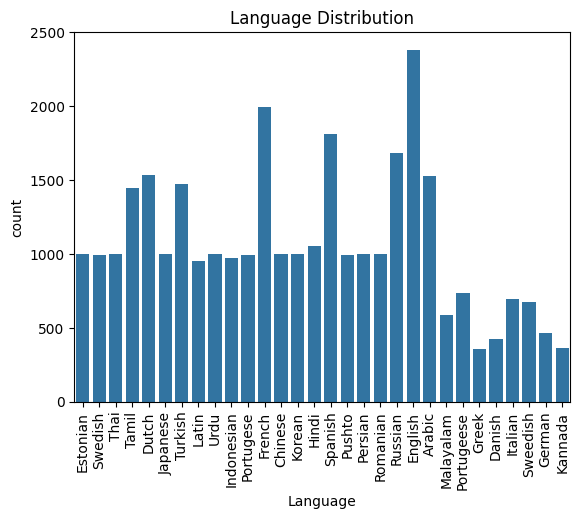

In [10]:
sns.countplot(data=merged_dataset, x='Language')
plt.title('Language Distribution')
plt.xticks(rotation=90)
plt.show()

In [11]:
from collections import Counter
all_text=''.join(merged_dataset['Text'].dropna())
word_counts = Counter(all_text.split()).most_common(10)
print(word_counts)

[('de', 23863), ('a', 9255), ('the', 7156), ('en', 7095), ('la', 7013), ('in', 6140), ('د', 5667), ('په', 4697), ('of', 4681), ('के', 4495)]


In [12]:
merged_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32130 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32130 non-null  object
 1   Language  32130 non-null  object
dtypes: object(2)
memory usage: 753.0+ KB


In [13]:
import re

In [14]:
def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
merged_dataset['Text'] = merged_dataset['Text'].dropna().apply(clean_text)


In [15]:
# Convert text to lowercase
merged_dataset['Text'] = merged_dataset['Text'].str.lower()

In [16]:
print(merged_dataset.info())
print(merged_dataset.head())


<class 'pandas.core.frame.DataFrame'>
Index: 32130 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32130 non-null  object
 1   Language  32130 non-null  object
dtypes: object(2)
memory usage: 753.0+ KB
None
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [18]:
# Step 1: Label Encoding
label_encoder = LabelEncoder()
merged_dataset['Language_Encoded'] = label_encoder.fit_transform(merged_dataset['Language'])

In [19]:
# Step 2: Feature Extraction
# Bag of Words
vectorizer_bow = CountVectorizer(max_features=1000)  # Limit to top 1000 features
bow_features = vectorizer_bow.fit_transform(merged_dataset['Text'])


In [20]:
bow_matrix = pd.DataFrame(
    bow_features.toarray(), 
    columns=vectorizer_bow.get_feature_names_out()
)
print("Bag of Words Matrix:")
print(bow_matrix.head())

Bag of Words Matrix:
   aan  aasta  aastal  ab  about  ac  ad  ada  adalah  af  ...  된다  또한  불타는  \
0    0      0       1   0      0   0   0    0       0   0  ...   0   0    0   
1    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
2    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
3    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
4    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   

   위해  이후  있는  있다  자신의  한다  함께  
0   0   0   0   0    0   0   0  
1   0   0   0   0    0   0   0  
2   0   0   0   0    0   0   0  
3   0   0   0   0    0   0   0  
4   0   0   0   0    0   0   0  

[5 rows x 1000 columns]


In [21]:
token_counts = bow_matrix.sum(axis=0)
print(token_counts.sort_values(ascending=False).head(10))  # Top 10 tokens


de     24153
the     7678
en      7468
la      7425
in      6567
په      4756
of      4691
que     3678
در      3563
et      3545
dtype: int64


C:\Users\Muhammad Mitkar\Desktop\LSN\NEW-VENV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Muhammad Mitkar\Desktop\LSN\NEW-VENV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


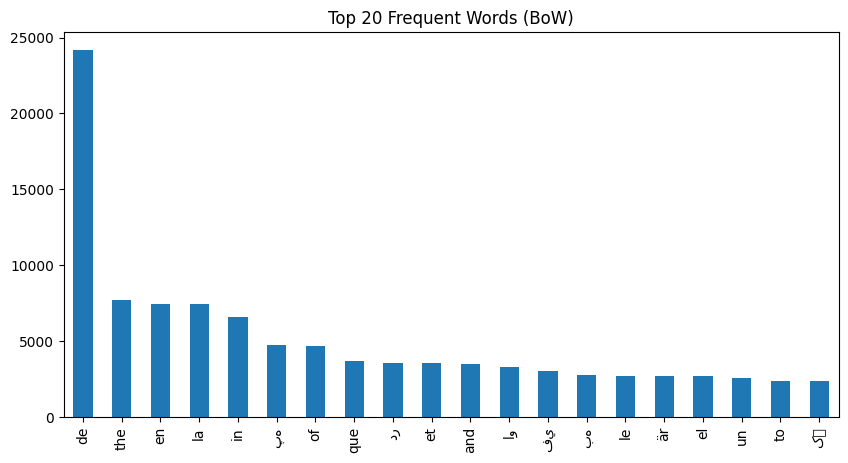

In [22]:
import matplotlib.pyplot as plt

top_tokens = token_counts.sort_values(ascending=False).head(20)
top_tokens.plot(kind='bar', figsize=(10, 5))
plt.title("Top 20 Frequent Words (BoW)")
plt.show()


In [23]:
for language in merged_dataset['Language'].unique():
    lang_texts = merged_dataset[merged_dataset['Language'] == language]['Text']
    lang_bow_features = CountVectorizer(max_features=1000).fit_transform(lang_texts)
    print(f"Language: {language}, BoW Shape: {lang_bow_features.shape}")


Language: Estonian, BoW Shape: (999, 1000)
Language: Swedish, BoW Shape: (992, 1000)
Language: Thai, BoW Shape: (1000, 1000)
Language: Tamil, BoW Shape: (1445, 1000)
Language: Dutch, BoW Shape: (1538, 1000)
Language: Japanese, BoW Shape: (1000, 1000)
Language: Turkish, BoW Shape: (1471, 1000)
Language: Latin, BoW Shape: (953, 1000)
Language: Urdu, BoW Shape: (1000, 1000)
Language: Indonesian, BoW Shape: (975, 1000)
Language: Portugese, BoW Shape: (997, 1000)
Language: French, BoW Shape: (1997, 1000)
Language: Chinese, BoW Shape: (1000, 1000)
Language: Korean, BoW Shape: (1000, 1000)
Language: Hindi, BoW Shape: (1052, 1000)
Language: Spanish, BoW Shape: (1812, 1000)
Language: Pushto, BoW Shape: (993, 1000)
Language: Persian, BoW Shape: (1000, 1000)
Language: Romanian, BoW Shape: (1000, 1000)
Language: Russian, BoW Shape: (1687, 1000)
Language: English, BoW Shape: (2382, 1000)
Language: Arabic, BoW Shape: (1530, 1000)
Language: Malayalam, BoW Shape: (591, 1000)
Language: Portugeese, BoW 

In [24]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
tfidf_features = vectorizer_tfidf.fit_transform(merged_dataset['Text'])
# N-Gram 
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), max_features=1000)
ngram_features = vectorizer_ngram.fit_transform(merged_dataset['Text'])

In [25]:
# Convert TF-IDF matrix to a DataFrame
tfidf_matrix = pd.DataFrame(
    tfidf_features.toarray(), 
    columns=vectorizer_tfidf.get_feature_names_out()
)
print("\nTF-IDF Matrix:")
print(tfidf_matrix.head())

# Convert N-Gram matrix to a DataFrame
ngram_matrix = pd.DataFrame(
    ngram_features.toarray(), 
    columns=vectorizer_ngram.get_feature_names_out()
)
print("\nN-Gram Matrix:")
print(ngram_matrix.head())


TF-IDF Matrix:
   aan  aasta    aastal   ab  about   ac   ad  ada  adalah   af  ...   된다  \
0  0.0    0.0  0.330151  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
1  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
2  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
3  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
4  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   

    또한  불타는   위해   이후   있는   있다  자신의   한다   함께  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]

N-Gram Matrix:
   aan de  aan het  ab anno  abril de  absolutam monstrat  according to  \
0       0        0        0         0                   0             0   
1       0        0        0         

In [26]:
print("Label Encoded Languages:")
print(merged_dataset[['Language', 'Language_Encoded']].head())

print("\nBag of Words Feature Shape:", bow_features.shape)
print("TF-IDF Feature Shape:", tfidf_features.shape)
print("N-Gram Feature Shape:", ngram_features.shape)

Label Encoded Languages:
   Language  Language_Encoded
0  Estonian                 5
1   Swedish                24
2      Thai                27
3     Tamil                26
4     Dutch                 3

Bag of Words Feature Shape: (32130, 1000)
TF-IDF Feature Shape: (32130, 1000)
N-Gram Feature Shape: (32130, 1000)


In [27]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = tfidf_matrix  # Use the TF-IDF features you generated
y = merged_dataset['Language_Encoded']  # Label encoded target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (25704, 1000), Test shape: (6426, 1000)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"---{name}---")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")


---Logistic Regression---
Accuracy: 0.8685
---Random Forest---
Accuracy: 0.8635
---Naive Bayes---
Accuracy: 0.8369


In [29]:
# Step 1: Preprocess the input text
def predict_language(input_text, model, vectorizer, label_encoder):
    # Clean the text
    cleaned_text = clean_text(input_text).lower()
    
    # Step 2: Transform the text to features
    transformed_text = vectorizer.transform([cleaned_text])
    
    # Step 3: Predict the language
    predicted_label = model.predict(transformed_text)[0]
    
    # Decode the label to the original language name
    predicted_language = label_encoder.inverse_transform([predicted_label])[0]
    
    return predicted_language

# Example Input
input_text = "ลาปาโลมา สเปน" 

# Choose a trained model (e.g., Random Forest)
chosen_model = models["Random Forest"]  # Use Random Forest for this example
chosen_vectorizer = vectorizer_tfidf  # Replace with the corresponding vectorizer
predicted_lang = predict_language(input_text, chosen_model, chosen_vectorizer, label_encoder)

print(f"The predicted language is: {predicted_lang}")


The predicted language is: Japanese


C:\Users\Muhammad Mitkar\Desktop\LSN\NEW-VENV\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Logistic Regression
log_reg_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_log_reg = GridSearchCV(
    LogisticRegression(max_iter=1000), 
    log_reg_params, 
    cv=5, 
    scoring='accuracy', 
    verbose=2
)
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(), 
    rf_params, 
    cv=5, 
    scoring='accuracy', 
    verbose=2
)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Naive Bayes
nb_params = {
    'alpha': [0.1, 0.5, 1, 5, 10]
}

grid_nb = GridSearchCV(
    MultinomialNB(), 
    nb_params, 
    cv=5, 
    scoring='accuracy', 
    verbose=2
)
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_

# Evaluate each model
y_pred_log_reg = best_log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_nb = best_nb.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.6min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.6min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.5min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.6min
